In [6]:
from keras.layers import Input, Dense
from keras.models import Model

In [7]:
encoding_dim=32

In [8]:
input_img = Input(shape=(784, ))

In [11]:
encoded_1 = Dense(128, activation='relu')(input_img)
encoded_2 = Dense(64, activation='relu')(encoded_1)
encoded = Dense(32, activation='relu')(encoded_2)

decoded_1 = Dense(64, activation='relu')(encoded)
decoded_2 = Dense(128, activation='relu')(decoded_1)
decoded = Dense(784, activation='sigmoid')(decoded_2)

In [12]:
autoencoder = Model(input_img, decoded)

In [13]:
encoder = Model(input_img, encoded)

In [24]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(encoded_input, decoder_layer)

In [15]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [16]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [17]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [18]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 0.2439 - val_loss: 0.1627
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 0.1481 - val_loss: 0.1361
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 0.1321 - val_loss: 0.1264
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.1239 - val_loss: 0.1185
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.1170 - val_loss: 0.1127
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 0.1122 - val_loss: 0.1090
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 0.1085 - val_loss: 0.1054
Epoch 8/50
60000/60000 [==============================] - 1s - loss: 0.1056 - val_loss: 0.1032
Epoch 9/50
60000/60000 [==============================] - 1s - loss: 0.1035 - val_loss: 0.1018
Epoch 10/50
60000/60000 [==============================] - 1s - loss: 0.1019 - val_loss: 0.1000

In [19]:
decoded_imgs = autoencoder.predict(x_test)

In [20]:
import matplotlib.pyplot as plt

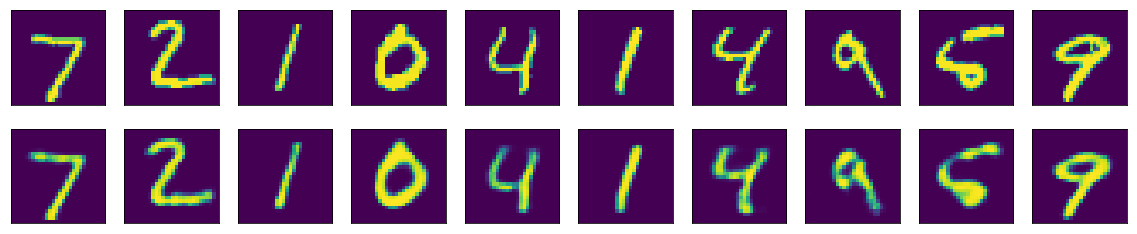

In [21]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

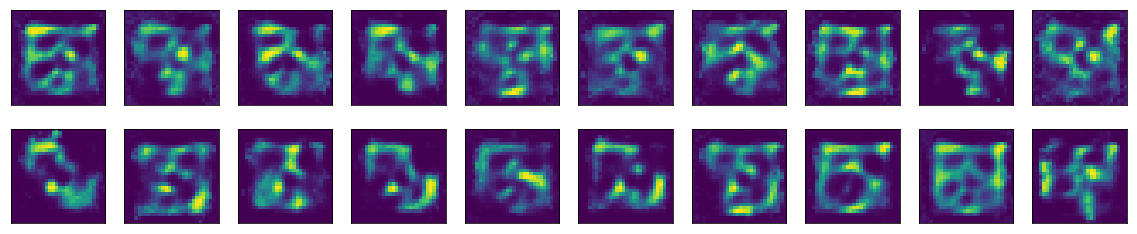

In [25]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoder.predict(np.random.normal(size=(1, 32))).reshape(28, 28))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoder.predict(np.random.exponential(size=(1, 32))).reshape(28, 28))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
